In [1]:
library(tidyverse)
library(haven)
library(dplyr)

install.packages("stargazer")
library(stargazer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [2]:
cchs <- read_dta("CCHS_Annual_2017_2018_curated_trimmed_25%.dta",
                 encoding = NULL,
                 c(hwtdgbmi,
                   hwtdgisw,
                   incdghh,
                   GEN_010,
                   GEN_015,
                   dhhgage,
                   CCC_095,
                   DHH_SEX,
                   paadvacv),
                 skip = 0,
                 n_max = Inf,
                 .name_repair = "unique") %>%
        drop_na() %>% 
        filter(hwtdgbmi != 999.96&999.99  & hwtdgisw != 6&9 & incdghh != 9 & GEN_010 != 97&98&99 & GEN_015 != 7&8&9 & dhhgage != 01&02 & paadvacv != 6&9) %>%
        rename("BMI" = "hwtdgbmi",
               "BMI_group" = "hwtdgisw",
               "income" = "incdghh",
               "happy_score" = "GEN_010",
               "mental_health" = "GEN_015",
               "age" = "dhhgage",
               "diabetes" = "CCC_095",
               "gender" = "DHH_SEX",
               "fitness" = "paadvacv") %>%
        mutate(BMI_group = as_factor(BMI_group),
               age = as_factor(age),
               diabetes = as_factor(diabetes), 
               BMI_group = as_factor(BMI_group),
               gender = as_factor(gender),
               fitness = as_factor(fitness),
               income = as_factor(income)) %>%
        mutate(mental_health = case_when(
            mental_health == 1 ~ 5,
            mental_health == 2 ~ 4,
            mental_health == 3 ~ 3,
            mental_health == 4 ~ 2,
            mental_health == 5 ~ 1,
        )) %>% 
        mutate(fitness = case_when(
            fitness == "Physically active at / above recommended level from CPAG" ~ "High activity",
            fitness == "Physically active below recommended level from CPAG" ~ "Low activity",
            fitness == "No physical activity minutes reported" ~ "No activity")) %>%
        mutate(across(c('BMI'), round, 0))


head(cchs)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(c("BMI"), round, 0)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


gender,age,happy_score,mental_health,BMI,BMI_group,diabetes,fitness,income
<fct>,<fct>,<dbl+lbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>
Female,Age between 45 and 49,10,5,20,Normal weight,No,Low activity,"$80,000 or more"
Female,Age between 50 and 54,6,3,23,Normal weight,No,No activity,"$40,000 to $59,999"
Female,Age between 70 and 74,10,5,29,Overweight,No,High activity,"$20,000 to $39,999"
Female,Age between 60 and 64,8,5,27,Overweight,No,Low activity,"$60,000 to $79,999"
Male,Age between 35 and 39,9,4,24,Normal weight,No,High activity,"$80,000 or more"
Male,Age between 55 and 59,6,4,29,Overweight,No,Low activity,"No income or less than $20,000"


In [3]:
summaryBMI <- select(cchs, happy_score, BMI_group) %>%
            group_by(BMI_group) %>% 
            summarise(Mean_happyscore = mean(happy_score), 
                      Min_happyscore = min(happy_score),
                      Max_happyscore = max(happy_score), 
                      Sd_happyscore = sd(happy_score)) %>%
            ungroup()

summaryBMI

summary <- select(cchs, happy_score, BMI_group, diabetes) %>%
            group_by(BMI_group, diabetes) %>% 
            summarise(Mean_happyscore = mean(happy_score), 
                      Min_happyscore = min(happy_score),
                      Max_happyscore = max(happy_score), 
                      Sd_happyscore = sd(happy_score)) %>%
            ungroup()

summary

write.csv(summaryBMI, "summaryBMI.csv", row.names = F)

BMI_group,Mean_happyscore,Min_happyscore,Max_happyscore,Sd_happyscore
<fct>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl>
Underweight,7.636139,0,10,1.978490
Normal weight,8.093193,0,10,1.642554
Overweight,8.113201,0,10,1.632970
"Obese - Class I, II, III",7.764633,0,10,1.846301


`summarise()` has grouped output by 'BMI_group'. You can override using the
`.groups` argument.


BMI_group,diabetes,Mean_happyscore,Min_happyscore,Max_happyscore,Sd_happyscore
<fct>,<fct>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl>
Underweight,Yes,7.083333,2,10,2.391589
Underweight,No,7.653061,0,10,1.965701
Normal weight,Yes,7.703371,0,10,1.975552
Normal weight,No,8.112403,0,10,1.622091
Overweight,Yes,7.700394,0,10,1.986696
Overweight,No,8.154898,0,10,1.587078
"Obese - Class I, II, III",Yes,7.492157,0,10,2.035248
"Obese - Class I, II, III",No,7.825038,0,10,1.796383


In [4]:
# Model 1: Linear functional form
lm1 <- lm(data = cchs, happy_score ~ BMI)

# Model 2: Quadratic functional form
lm2 <- lm(data = cchs, happy_score ~ BMI+I(-BMI^2)+diabetes+ age+ gender)

# Model 3: Logarithmic functional form
lm3 <- lm(data = cchs, happy_score ~ BMI +I(log(BMI))+diabetes+ age+ gender + fitness)

# Compare models using adjusted R-squared
summary(lm1)$adj.r.squared
summary(lm2)$adj.r.squared
summary(lm3)$adj.r.squared

[1] 0.004966393

[1] 0.01706403

[1] 0.02353636

In [5]:
simple <- lm(data = cchs, happy_score ~ BMI)
multi <- lm(data = cchs, happy_score ~ BMI + diabetes)
interaction <- lm(data = cchs, happy_score ~ BMI + diabetes + BMI*diabetes)
nonlinear <- lm(data = cchs, happy_score ~ BMI + I(log(BMI)) + diabetes)
controls <- lm(data = cchs, happy_score ~ BMI + I(log(BMI)) + diabetes + age + gender + fitness)

var_omit = c("(age)\\w+","(gender)\\w+")
stargazer(multi, interaction, nonlinear,controls, 
          title="Comparison of Regression Results", omit = var_omit,
          align = TRUE, type="text", keep.stat = c("n","rsq", "adj.rsq", "ser","f"),
          out = "path/fit.tex")


Comparison of Regression Results
                                                               Dependent variable:                                            
                    ----------------------------------------------------------------------------------------------------------
                                                                   happy_score                                                
                               (1)                        (2)                       (3)                        (4)            
------------------------------------------------------------------------------------------------------------------------------
BMI                         -0.019***                  -0.027***                 -0.212***                  -0.211***         
                             (0.002)                    (0.007)                   (0.016)                    (0.017)          
                                                                             

ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


`geom_smooth()` using formula = 'y ~ x'


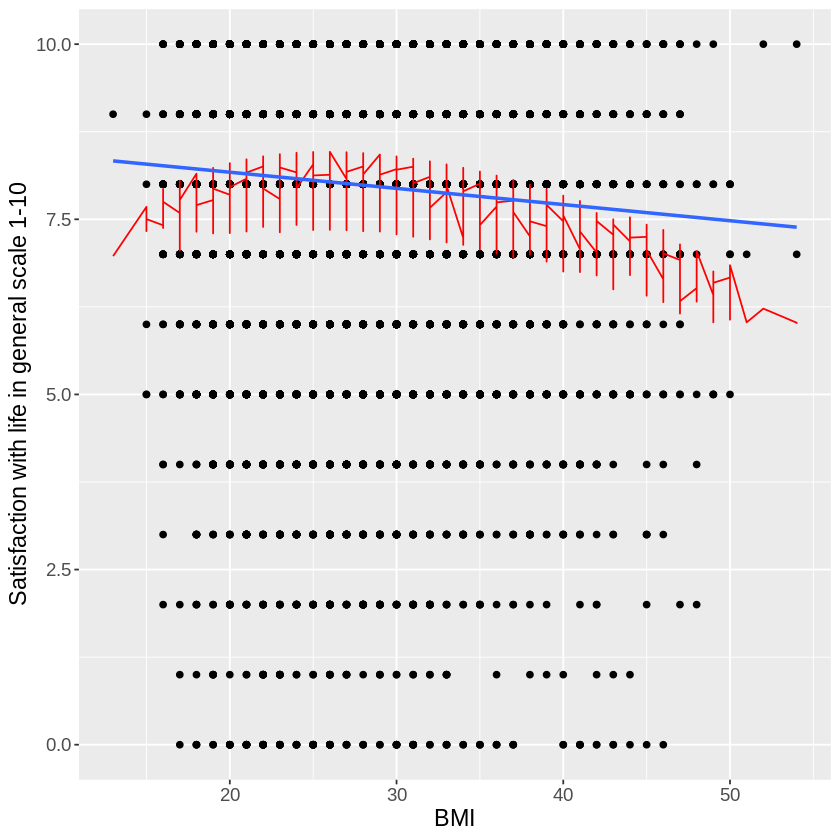

In [6]:
df <- data.frame(BMI = cchs$BMI,
                 predicted = predict(controls))

ggplot(data = cchs, aes(x = BMI, y = happy_score)) +  
  geom_point() +
  geom_line(data = df, aes(x = BMI, y = predicted), color = "red") +
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "BMI", 
       y = "Satisfaction with life in general scale 1-10") +
  theme(text = element_text(size = 14))

In [7]:
library(lmtest)
bptest_simple <- bptest(simple)
bptest_multi <- bptest(multi)
bptest_interaction <- bptest(interaction)
bptest_nonlinear <- bptest(nonlinear)
bptest_controls <- bptest(controls)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [8]:
print(bptest_simple)
print(bptest_multi)
print(bptest_interaction)
print(bptest_nonlinear)
print(bptest_controls)


	studentized Breusch-Pagan test

data:  simple
BP = 32.694, df = 1, p-value = 1.078e-08


	studentized Breusch-Pagan test

data:  multi
BP = 99.527, df = 2, p-value < 2.2e-16


	studentized Breusch-Pagan test

data:  interaction
BP = 100.75, df = 3, p-value < 2.2e-16


	studentized Breusch-Pagan test

data:  nonlinear
BP = 157.5, df = 3, p-value < 2.2e-16


	studentized Breusch-Pagan test

data:  controls
BP = 378.73, df = 19, p-value < 2.2e-16



In [9]:
cchs <- cchs %>% mutate(BMI_group = case_when(
            BMI_group == "Underweight" ~ 0,
            BMI_group == "Normal weight" ~ 1,
            BMI_group == "Overweight" ~ 0,
            BMI_group == "Obese - Class I, II, III" ~ 0))%>% 
        mutate(income = case_when(
            income == "No income or less than $20,000" ~ 10000,
            income == "$20,000 to $39,999" ~ 30000,
            income == "$40,000 to $59,999" ~ 50000,
            income == "$60,000 to $79,999" ~ 70000,
            income == "$80,000 or more" ~ 90000))
head(cchs)

gender,age,happy_score,mental_health,BMI,BMI_group,diabetes,fitness,income
<fct>,<fct>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
Female,Age between 45 and 49,10,5,20,1,No,Low activity,90000
Female,Age between 50 and 54,6,3,23,1,No,No activity,50000
Female,Age between 70 and 74,10,5,29,0,No,High activity,30000
Female,Age between 60 and 64,8,5,27,0,No,Low activity,70000
Male,Age between 35 and 39,9,4,24,1,No,High activity,90000
Male,Age between 55 and 59,6,4,29,0,No,Low activity,10000


In [10]:
simple <- lm(data = cchs, happy_score ~ BMI + diabetes + BMI_group)
robustness1 <- lm(data = cchs, mental_health ~ BMI + diabetes + BMI_group)
robustness2 <- lm(data = cchs, income ~ BMI + diabetes + BMI_group)

stargazer(simple, robustness1, title="ALTERNATIVE SATISFACTION MEASUREMENT REGRESSION MODEL",
          align = TRUE, type="text", keep.stat = c("n","rsq", "adj.rsq", "ser","f"))


ALTERNATIVE SATISFACTION MEASUREMENT REGRESSION MODEL
                                     Dependent variable:     
                                 ----------------------------
                                  happy_score   mental_health
                                      (1)            (2)     
-------------------------------------------------------------
BMI                                -0.024***      -0.011***  
                                    (0.003)        (0.002)   
                                                             
diabetesNo                          0.395***      0.109***   
                                    (0.038)        (0.022)   
                                                             
BMI_group                           -0.075**      -0.054***  
                                    (0.031)        (0.017)   
                                                             
Constant                            8.329***      4.116***   
               